In [40]:
# mkdir
import os
os.makedirs('experiment/original/')
os.makedirs('experiment/mutants/')
os.makedirs('experiment/xml_input/')
os.makedirs('experiment/xml_output/')
os.makedirs('experiment/tests/')

In [41]:
import subprocess
import xml.etree.ElementTree as ET

In [42]:
# Generate original files
with open('data/TransCoder_tokenized_test_set_functions/test.java.shuf.valid.tok', 'r') as f:
    data = f.readlines()

for item in data:
    k_and_v = item.split(' | ', 1)
    k, v = k_and_v[0], k_and_v[1]
    with open('experiment/original/' + k + '.java', 'w') as f:
        f.write(v)

In [43]:
# Generate input XML files
import IPython
for entry in os.scandir('experiment/original'):
    print(entry.name)
    # Read Java file and srcML it to XML
    with open('experiment/xml_input/' + entry.name.split('.')[0] + '.xml', 'w+') as f:
        subprocess.run(['srcml', entry.path], stdout=f)
    IPython.display.clear_output()

In [44]:
# Transformation
for entry in os.scandir('experiment/xml_input'):
    # Parse into AST
    try:
        tree = ET.parse(entry.path)
    except Exception as e:
        print(entry.name)
        print(e)
        continue
    root = tree.getroot()
    ns = {'src': 'http://www.srcML.org/srcML/src'}

    num_do, num_for, num_if, num_switch, num_while = 0, 0, 0, 0, 0

    for elem in root.iter():
        for item in elem.findall('src:do', ns):
            elem.remove(item)
            tree.write('experiment/xml_output/do__' + str(num_do) + '__' + entry.name)
            num_do += 1

        for item in elem.findall('src:for', ns):
            elem.remove(item)
            tree.write('experiment/xml_output/for__' + str(num_for) + '__' + entry.name)
            num_for += 1
        
        for item in elem.findall('src:if_stmt', ns):
            elem.remove(item)
            tree.write('experiment/xml_output/if__' + str(num_if) + '__' + entry.name)
            num_if += 1

        for item in elem.findall('src:switch', ns):
            elem.remove(item)
            tree.write('experiment/xml_output/switch__' + str(num_switch) + '__' + entry.name)
            num_switch += 1
    
        for item in elem.findall('src:while', ns):
            elem.remove(item)
            tree.write('experiment/xml_output/while__' + str(num_while) + '__' + entry.name)
            num_while += 1

In [45]:
# Output XML files to Java output
for entry in os.scandir('experiment/xml_output'):
    with open('experiment/mutants/' + entry.name.split('.')[0] + '.java', 'w+') as f:
        subprocess.run(['srcml', entry.path], stdout=f)

In [46]:
# Translate

In [33]:
import IPython
import pandas as pd
import subprocess

d = {'key': [], 'Computational accuracy': []}
# blocklist = ['for__0__MOVE_ZEROES_END_ARRAY.py', 'if__0__CHECK_IF_A_NUMBER_IS_POWER_OF_ANOTHER_NUMBER.py', 'if__1__MODULUS_TWO_FLOAT_DOUBLE_NUMBERS.py', 'if__0__ALTERNATIVE_SORTING.py', 'if__2__MODULUS_TWO_FLOAT_DOUBLE_NUMBERS.py', 'while__0__COUNT_FACTORIAL_NUMBERS_IN_A_GIVEN_RANGE.py', 'while__1__K_TH_ELEMENT_TWO_SORTED_ARRAYS.py']
blocklist = ['SUM_K_TH_GROUP_ODD_POSITIVE_NUMBERS.py', 'ALTERNATIVE_SORTING.py', 'MINIMUM_LENGTH_SUBARRAY_SUM_GREATER_GIVEN_VALUE.py', 'MOVE_ZEROES_END_ARRAY.py', 'NUMBER_IS_DIVISIBLE_BY_29_OR_NOT.py', 'PRINT_WORDS_STRING_REVERSE_ORDER.py', 'NUMBER_TRIANGLES_N_MOVES_1.py', 'MINIMUM_LENGTH_SUBARRAY_SUM_GREATER_GIVEN_VALUE_1.py']

for entry in os.scandir('experiment_jp_test/tests'):
    if entry.name not in blocklist:
        print(entry.name)
        out = subprocess.run(['python3', entry.path], capture_output=True).stdout
        out = out.decode()
        if out:
            if out[0] == '#':
                unkilled = float(out.split(', ')[0].split(' ')[1])
                total = float(out.split(', ')[1].split('\n')[0])
                # mutation_score = (total - unkilled) / total
                mutation_score = unkilled / total
                
                d['key'].append(entry.name.split('.')[0])
                d['Computational accuracy'].append(mutation_score)

        IPython.display.clear_output()

df = pd.DataFrame(data=d)
df

,key,Computational accuracy
0,PRIMALITY_TEST_SET_1_INTRODUCTION_AND_SCHOOL_M...,1.0
1,FIND_LARGEST_D_IN_ARRAY_SUCH_THAT_A_B_C_D,0.8
2,PROGRAM_TO_FIND_REMAINDER_WITHOUT_USING_MODULO...,1.0
3,MODULUS_TWO_FLOAT_DOUBLE_NUMBERS,1.0
4,NUMBER_SUBSTRINGS_STRING,1.0
...,...,...
251,LENGTH_LONGEST_SUB_STRING_CAN_MAKE_REMOVED,1.0
252,FIND_PAIR_WITH_GREATEST_PRODUCT_IN_ARRAY,1.0
253,PROGRAM_AREA_SQUARE,1.0
254,FINDING_POWER_PRIME_NUMBER_P_N_1,1.0


In [34]:
df3 = pd.concat([df, df2])
df3.describe()

,Computational accuracy
count,405.000000
mean,0.770370
std,0.381582
min,0.000000
25%,0.600000
50%,1.000000
75%,1.000000
max,1.000000


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fd5bdc95a30&gt;

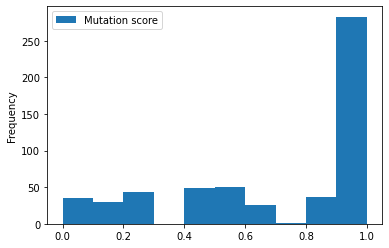

In [16]:
df3.plot.hist()

In [35]:
df3.to_csv('original.csv')

In [39]:
df4 = pd.read_csv('original.csv', usecols=['key', 'Computational accuracy'])
df4

,key,Computational accuracy
0,PRIMALITY_TEST_SET_1_INTRODUCTION_AND_SCHOOL_M...,1.0
1,FIND_LARGEST_D_IN_ARRAY_SUCH_THAT_A_B_C_D,0.8
2,PROGRAM_TO_FIND_REMAINDER_WITHOUT_USING_MODULO...,1.0
3,MODULUS_TWO_FLOAT_DOUBLE_NUMBERS,1.0
4,NUMBER_SUBSTRINGS_STRING,1.0
...,...,...
400,QUICK_WAY_CHECK_CHARACTERS_STRING,1.0
401,MINIMUM_FLIP_REQUIRED_MAKE_BINARY_MATRIX_SYMME...,1.0
402,SUM_SERIES_12_32_52_2N_12,0.0
403,COUNT_STRINGS_CAN_FORMED_USING_B_C_GIVEN_CONST...,0.0


In [40]:
df5 = pd.read_csv('mutants.csv', usecols=['key', 'Mutation score'])
df5

,key,Mutation score
0,GIVEN_A_SORTED_AND_ROTATED_ARRAY_FIND_IF_THERE...,0.2
1,SMALLEST_OF_THREE_INTEGERS_WITHOUT_COMPARISON_...,0.9
2,FIND_NUMBER_TRANSFORMATION_MAKE_TWO_MATRIX_EQUAL,0.9
3,PRIME_NUMBERS,0.8
4,DECIMAL_REPRESENTATION_GIVEN_BINARY_STRING_DIV...,0.2
...,...,...
550,NUMBER_N_DIGIT_STEPPING_NUMBERS,1.0
551,MINIMUM_COST_MAKE_ARRAY_SIZE_1_REMOVING_LARGER...,0.3
552,FIND_REPETITIVE_ELEMENT_1_N_1,1.0
553,K_TH_MISSING_ELEMENT_INCREASING_SEQUENCE_NOT_P...,0.3


In [46]:
# df4.join(df5.set_index('key'), on='key', how='outer')
df6 = pd.merge(df4, df5, on='key', how='outer')
df6.to_csv('transcoder_compare_result.csv')

In [3]:
# class wrapper for j2py translation
for entry in os.scandir('experiment_jp_test/mutants'):
    with open(entry.path) as f:
        with open('experiment_jp_test/j2pyraw/' + entry.name, 'w') as fi:
            fi.write('class X { ' + f.readline() + ' }')

In [4]:

import subprocess
import IPython
for entry in os.scandir('experiment_jp_test/j2pyraw'):
    print(entry.name)
    subprocess.run(['j2py', entry.path, 'experiment_jp_test/j2pyrawpy/' + entry.name.split('.')[0] + '.py'])
    IPython.display.clear_output()

In [15]:
# Insert j2py tests
import subprocess
import IPython
import re
for entry in os.scandir('experiment_jp_test/j2pyrawpy'):
    desc = entry.name.split('__')[2]
    print(entry.name)

    with open(entry.path) as f:
        lines = f.readlines()
        ind = int()
        for item in lines:
            if item.startswith('        \"\"\" generated source for method '):
                ind = lines.index(item) - 1
                break
        data = [item.replace('    ', '', 1) for item in lines[ind :]]
        data[0] = re.sub("def.*\(cls, ", "def f_filled (", data[0])
        out_func = ''.join(data)

    try:
        with open('data/evaluation/geeks_for_geeks_successful_test_scripts/python/' + desc) as f:
            lines = f.readlines()
            lines.insert(lines.index('#TOFILL\n') + 1, out_func + '\n')

        with open('experiment_jp_test/j2pytests/' + entry.name, 'w') as f:
            f.write(''.join(lines))
    except FileNotFoundError as e:
        print(e)
        continue

RAMMING_SET_17_PALINDROME_PARTITIONING_1.py
for__0__MAXIMIZE_VOLUME_CUBOID_GIVEN_SUM_SIDES.py
if__0__SUM_NODES_K_TH_LEVEL_TREE_REPRESENTED_STRING_1.py
[Errno 2] No such file or directory: &#39;data/evaluation/geeks_for_geeks_successful_test_scripts/python/SUM_NODES_K_TH_LEVEL_TREE_REPRESENTED_STRING_1.py&#39;
if__0__CONVERTING_ONE_STRING_USING_APPEND_DELETE_LAST_OPERATIONS.py
for__0__PRINT_TRIPLETS_SORTED_ARRAY_FORM_AP.py
[Errno 2] No such file or directory: &#39;data/evaluation/geeks_for_geeks_successful_test_scripts/python/PRINT_TRIPLETS_SORTED_ARRAY_FORM_AP.py&#39;
for__0__K_NUMBERS_DIFFERENCE_MAXIMUM_MINIMUM_K_NUMBER_MINIMIZED.py
while__1__LOWER_INSERTION_POINT.py
for__0__SHORTEST_UNCOMMON_SUBSEQUENCE.py
[Errno 2] No such file or directory: &#39;data/evaluation/geeks_for_geeks_successful_test_scripts/python/SHORTEST_UNCOMMON_SUBSEQUENCE.py&#39;
if__0__NEXT_POWER_OF_2.py
for__0__SORT_ARRAY_WAVE_FORM_2_1.py
for__2__MAXIMUM_PATH_SUM_STARTING_CELL_0_TH_ROW_ENDING_CELL_N_1_TH_ROW.py
[Er

In [43]:
import re
with open('output_code.py') as f:
    lines = f.readlines()
    data = [item.replace('    ', '', 1) for item in lines[lines.index('    @classmethod\n') + 1 : ]]
    data[0] = re.sub("def.*\(cls, ", "def f_filled (", data[0])
data

[&#39;def f_filled (W, wt, val, n):\n&#39;,
 &#39;    &quot;&quot;&quot; generated source for method knapSack &quot;&quot;&quot;\n&#39;,
 &#39;    i = int()\n&#39;,
 &#39;    w = int()\n&#39;,
 &#39;    K = [None]*n + 1\n&#39;,
 &#39;    return K[n][W]\n&#39;,
 &#39;\n&#39;]

In [49]:
import subprocess
import pandas as pd

blocklist = ['for__0__MOVE_ZEROES_END_ARRAY.py', 'if__0__CHECK_IF_A_NUMBER_IS_POWER_OF_ANOTHER_NUMBER.py', 'if__1__MODULUS_TWO_FLOAT_DOUBLE_NUMBERS.py', 'if__0__ALTERNATIVE_SORTING.py', 'if__2__MODULUS_TWO_FLOAT_DOUBLE_NUMBERS.py', 'while__0__COUNT_FACTORIAL_NUMBERS_IN_A_GIVEN_RANGE.py', 'while__1__K_TH_ELEMENT_TWO_SORTED_ARRAYS.py']
d = {'key': [], 'mutator': [], 'number': [], 'computational accuracy': []}

for entry in os.scandir('experiment_jp_valid/tests'):
    if entry.name not in blocklist:
        print(entry.name)
        out = subprocess.run(['python3', entry.path], capture_output=True).stdout
        out = out.decode()
        if out:
            if out[0] == '#':
                unkilled = float(out.split(', ')[0].split(' ')[1])
                total = float(out.split(', ')[1].split('\n')[0])
                
                d['key'].append(entry.name.split('.')[0].split('__')[2])
                d['mutator'].append(entry.name.split('.')[0].split('__')[0])
                d['number'].append(entry.name.split('.')[0].split('__')[1])
                d['computational accuracy'].append(unkilled / total)

        IPython.display.clear_output()

df2 = pd.DataFrame(data=d)
df2

,key,mutator,number,computational accuracy
0,MINIMUM_TIME_TO_FINISH_TASKS_WITHOUT_SKIPPING_...,for,0,0.0
1,FIND_MAXIMUM_PRODUCT_OF_A_TRIPLET_IN_ARRAY,if,0,0.1
2,MAXIMUM_PRODUCT_SUBSET_ARRAY,if,1,0.3
3,FIND_SUM_ODD_FACTORS_NUMBER,if,0,0.1
4,WRITE_ONE_LINE_C_FUNCTION_TO_FIND_WHETHER_A_NO...,while,0,0.4
...,...,...,...,...
202,NUMBER_N_DIGIT_STEPPING_NUMBERS,for,0,0.0
203,MINIMUM_COST_MAKE_ARRAY_SIZE_1_REMOVING_LARGER...,for,0,0.7
204,FIND_REPETITIVE_ELEMENT_1_N_1,for,0,0.0
205,K_TH_MISSING_ELEMENT_INCREASING_SEQUENCE_NOT_P...,for,1,0.7


In [51]:
df3 = pd.concat([df, df2])
df3.to_csv('individual_mutants_result.csv')